<a href="https://colab.research.google.com/github/engogola/Natural-language-processing-NLP-Zero-to--Hero/blob/main/NLP_zero_to_hero_learning_by_Ogola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From the findamental of natural language processing ,my journey of learning nlp ,The series include


1.   Tokenization

1.   Pre-Processing

1.   Bag of words and similarity

1.   TF-IDF and Document search
2.   Naive Bayes and text classification
2.   LDA  and word Embeddings
2.   Machine translation Attention

2.   Transfomers and RNN_LMs



**1) TOKENIZATION**
Tokenization is the process of breaking down a corpus into tokens. The procedure might look like segmenting a piece of text into sentences and then further segmenting these sentences into individual words, numbers and punctuation, which would be tokens.

In [ ]:
# import spacy library
import spacy
print(spacy.__version__)

3.7.6


 Next we load a statistical model of the English language trained on web articles. Its capabilities include tokenization, among other things.

In [ ]:
#load the spacy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
#tokenize the string
s ="Richard doesn't like to read books."
doc = nlp(s)
# print tokens
print([token.text for token in doc])

['Richard', 'does', "n't", 'like', 'to', 'read', 'books', '.']


**Pre-Processing**

The pre-processing steps includes case folding i.e converting every token to uniform lower case or upper case


1.   stop word removal
2.   Lemmatization

1.   Stemming
2.   Part of speech tagging

1.   Named-Entity Recognition







.

Case-Folding;This is the act of converting every token to be uniformly lower case or upper case.

This can be beneficial because it will reduce the number of unique tokens in a corpus, i,e. the size of the vocabulary, hence make the processing of these tokens more memory and computational effecient. The downside however is information loss.

In [ ]:
#Tokenize
s ="Richard doesn't like to read books."
doc = nlp(s)
#case fold
print([token.text.lower() for token in doc])


['richard', 'does', "n't", 'like', 'to', 'read', 'books', '.']


In [ ]:
#Conditional case folding i.e skip the firdt word in a sentence
print([token.text.upper() if token.i==0 else token.text.lower() for token in doc])

['RICHARD', 'does', "n't", 'like', 'to', 'read', 'books', '.']


2) Stop-word removal;

Stop words are words that appear commonly but carry little information. Examples include, "a", "the", "of", "an", "this","that". Similar to case folding, removing stop words can improve efficiency but comes at the cost of losing contextual information.

In [ ]:
#print spacy's stop word list
print(nlp.Defaults.stop_words)
print(len(nlp.Defaults.stop_words))

{'whither', 'either', 'through', 'might', 'ca', 'many', 'my', 'perhaps', 'thence', 'formerly', 'to', 'each', 'what', 'just', 'above', 'among', 'upon', 'more', 'should', 'too', 'up', 'one', 'must', 'ten', 'why', 'your', 'bottom', 'done', 'neither', 'on', 'cannot', 'can', 'used', 'throughout', 'are', '‘re', 'yourself', 'least', 'because', 'almost', 'with', 'enough', 'within', 'much', 'back', 'put', 'into', 'beside', 'give', 'often', 'alone', 'own', 'there', 'name', 'they', 'those', 'some', 'only', 'before', 'as', 'where', 'seemed', 'whereby', 'am', 'whatever', 'whoever', 'and', 'twenty', 'top', 'these', 'made', 'four', 'whereafter', 'in', 'twelve', 'the', 'again', 'latterly', '‘d', 'third', 'whereas', 'nor', 'mine', 'noone', 'amount', 'behind', 'six', 'herein', 'something', 'so', 'a', 'call', 'fifteen', 'sometimes', 'here', 'afterwards', 'eight', 'three', 'whose', '’d', 'whether', 'he', 'myself', 'yet', 'always', 'could', 'front', '‘ll', 'make', 'same', 'everything', 'serious', 'using', 

In [ ]:
#Remove stop words
print([token.text for token in doc if not token.is_stop])

['Richard', 'like', 'read', 'books', '.']


**3) Stemming**

Stemming is the act of reducing a word to its stem by removing suffixes and sometimes prefixes depending on the language.

For example, the words "developed" and "developing" both have the stem "develop".

While this technique also reduces the size of the vocabulary, it can result in invalid words, for example "studies" might be stemmed to studi hence not used nowadays ,been replaced by Lemmatization

**Lemmatization**

Lemmatization reduces a word down to its lemma, i.e. dictionary form.

While this is similar to stemming, it also takes into account things like tenses and synonyms. For example, the words "did", "done" and "doing" would be converted to the base form "do".

In [ ]:
#lemmatize using .lemma attribute
print([token.lemma_ for token in doc])


['Richard', 'do', 'not', 'like', 'to', 'read', 'book', '.']


Advanced pre-processing

**Part-of-speech tagging**

Part-of-speech tagging is the method of classifying how a word is used in a sentence, for example, noun, verb, adjective.



In [ ]:
# part of speech
print([(t.text,t.pos_)for t in doc])


[('Richard', 'PROPN'), ('does', 'AUX'), ("n't", 'PART'), ('like', 'VERB'), ('to', 'PART'), ('read', 'VERB'), ('books', 'NOUN'), ('.', 'PUNCT')]


**Named-Entity recognition**
Named Entity Recognition (NER) is the act of tagging named entities in text.

A named entity is anything that can be referred to by a proper name and usually has the proper noun tag. Common examples include a person, cities, countries and companies. Note that it is common to extend entities to include money, time, dates, etc.

NER can help categorize and organize a corpus. It is especially useful, for example, in helping chatbots raise accurate support tickets depending on the customer problem.

Some of the challenges to building a state-of-the-art NER model include type ambiguity, where one word can have multiple meanings (e.g. Amazon - river or company?) and the fact that entities can span multiple tokens (e.g. John Smith). Luckily, spacy has very good NER model that we can utilize.

In [ ]:
# Named Entity Recognition
#Tokenize
s = "Apple is looking at buying Kenyan startup for $1 billion"
doc = nlp(s)

In [ ]:
#Doing NER by .ent_type
print([(t.text,t.ent_type_)for t in doc])

[('Apple', 'ORG'), ('is', ''), ('looking', ''), ('at', ''), ('buying', ''), ('Kenyan', 'NORP'), ('startup', ''), ('for', ''), ('$', 'MONEY'), ('1', 'MONEY'), ('billion', 'MONEY')]


In [ ]:
#only Print entities
print([(t.text,t.ent_type_)for t in doc if t.ent_type !=0])

[('Apple', 'ORG'), ('Kenyan', 'NORP'), ('$', 'MONEY'), ('1', 'MONEY'), ('billion', 'MONEY')]


In [ ]:
#Explain Explanation
print('ORG',spacy.explain('ORG'))
print('GPE',spacy.explain('GPE'))
print('MONEY',spacy.explain('MONEY'))
print('NORP',spacy.explain('NORP'))

ORG Companies, agencies, institutions, etc.
GPE Countries, cities, states
MONEY Monetary values, including unit
NORP Nationalities or religious or political groups


In [ ]:
#Doing NER in Spacy by using .ents Attribute
print([(ent.text,ent.label_) for ent in doc.ents])

[('Apple', 'ORG'), ('Kenyan', 'NORP'), ('$1 billion', 'MONEY')]


In [ ]:
#Visualise the entites using a spacy built function
from spacy import displacy
#Visualise entities
displacy.render(doc,style='ent',jupyter=True)

**3) Bag Of Words**

After tokenization and pre-processing, we are left with variable length sequences of text, but the problem is machine learning algorithms require fixed length vectors of numbers.

The simplest approach to overcome this is by using a bag-of-words, which simply counts how many times each word appears in a document. It's called a bag because the order of the words is ignored - we only care about whether a word appeared or not.

For now, we'll focus on the binary version of a bag-of-words. This just indicates whether a word appeared or not, ignoring word order and word frequency.
Each row in a binary bag-of-words matrix corresponds to a single document in the corpus. Each column corresponds to a token in the vocabulary. Note that the order of the tokens isn't important but it does need to be fixed beforehand when building the vocabulary.

To construct the matrix, we place a 1 in entry (i,j) if and only if the j-th token appears in the i-th document and a 0 otherwise.

For a general bag-of-words, the (i,j) entry would instead be the frequency of the j-th token in the i-th document (but we will see there are better ways to encode frequency later).




Similiarity;Vector space search
We have gone from thinking of documents as a sequence of words to points in a multi-dimensional vector space. Importantly, the dimension of this space if fixed, i.e. each vector has the same length.



here are many metrics we could use to measure how 'close' two points are. For example, we could consider using the Euclidean distance, Manhattan distance or even Hamming distance. However, if documents in the same corpus have very different lengths, or the vocabulary is extremely large, these metrics become less reliable.

Instead, in the NLP domain it is much more common to use Cosine Similarity. This measures the cosine of the angle between any two points (more precisely their vectors starting from the origin). The closer the score 1, the smaller the angle between the vectors and the more similar the documents are.

n-gram
One way to get around the problem of losing word order information is to use n-grams. This is when we group chunks of n tokens together to behave as if they were a single token.

A 2-gram (aka bigram) would have 2 tokens per chunk, a 3-gram (aka trigram) would have 3 tokens per chuck, etc.

In [ ]:
#import libraries
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

Define the corpus .In this example we will use some of the top news from 2022

In [ ]:
# A corpus containing a collection of sentences
corpus = [
    "Inflation surges around the world.",
    "Stocks rise after the market crash.",
    "AI predicted protein structures",
    "The company CEO is leaving the company.",
    "World population exceeds 8 bilion",
]

In [ ]:
# creating a Bag-of-words Matrix
#initialize  Vectorizer
vectorizer = CountVectorizer()

In [ ]:
#fit the vectorizer to corpus
bow = vectorizer.fit_transform(corpus)

We can see the vocabulary dictionary mapping using the .vocabulary_ method. We could also use the .get_feature_names_out() to see just the words.

In [ ]:
#view Vocabulary
print(vectorizer.vocabulary_)

{'inflation': 8, 'surges': 18, 'around': 2, 'the': 19, 'world': 20, 'stocks': 16, 'rise': 15, 'after': 0, 'market': 11, 'crash': 6, 'ai': 1, 'predicted': 13, 'protein': 14, 'structures': 17, 'company': 5, 'ceo': 4, 'is': 9, 'leaving': 10, 'population': 12, 'exceeds': 7, 'bilion': 3}


In [ ]:
bow

<5x21 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [ ]:
print(bow)

  (0, 8)	1
  (0, 18)	1
  (0, 2)	1
  (0, 19)	1
  (0, 20)	1
  (1, 19)	1
  (1, 16)	1
  (1, 15)	1
  (1, 0)	1
  (1, 11)	1
  (1, 6)	1
  (2, 1)	1
  (2, 13)	1
  (2, 14)	1
  (2, 17)	1
  (3, 19)	2
  (3, 5)	2
  (3, 4)	1
  (3, 9)	1
  (3, 10)	1
  (4, 20)	1
  (4, 12)	1
  (4, 7)	1
  (4, 3)	1


In [ ]:
#convert the sparse matrix into a dense matrix
bow.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

Custom tokenizer using spacy

In [ ]:
#load English language model
nlp = spacy.load('en_core_web_sm')

#define custom tokenizer
def custom_tokenizer(doc):
    return [token.lemma_ for token in nlp(doc) if (not token.is_stop and not token.is_punct)]

In [ ]:
# pass the tokenizer as a callback fxn to countvectorize
vectorizer = CountVectorizer(tokenizer=custom_tokenizer,binary=True)

# fit vecotrizer to corpus
bow = vectorizer.fit_transform(corpus)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
vectorizer.vocabulary_

{'inflation': 7,
 'surge': 16,
 'world': 17,
 'stock': 14,
 'rise': 13,
 'market': 9,
 'crash': 5,
 'ai': 1,
 'predict': 11,
 'protein': 12,
 'structure': 15,
 'company': 4,
 'ceo': 3,
 'leave': 8,
 'population': 10,
 'exceed': 6,
 '8': 0,
 'bilion': 2}

Document similiraty

Here we will measure the cosine similiraty  between the documnets in our corpus

In [ ]:
#cosine similiraty using numpy
def cosine_sim(a,b):
    return np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [ ]:
#similarity between two documents
print (corpus[1])
print (corpus[3])
print (f'Similarity: {cosine_sim(bow[1].toarray().squeeze(),bow[3].toarray().squeeze()):.3f}')


Stocks rise after the market crash.
The company CEO is leaving the company.
Similarity: 0.000


In [ ]:
# similarity between two documents
print (corpus[0])
print (corpus[4])
print (f'Similarity: {cosine_sim(bow[0].toarray().squeeze(),bow[4].toarray().squeeze()):.3f}')
#

Inflation surges around the world.
World population exceeds 8 bilion
Similarity: 0.258


In [ ]:
# cosine similarity
print(cosine_similarity(bow))

[[1.         0.         0.         0.         0.25819889]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.25819889 0.         0.         0.         1.        ]]


n-grams

In [ ]:
# unigrams and bigrams with ngram_range=(1,2)
vectorizer = CountVectorizer(tokenizer=custom_tokenizer,lowercase=False ,binary= True, ngram_range=(1,2))

#fit vectorizer to corpus
unibigram_bow = vectorizer.fit_transform(corpus)

#print vocabulary size
print(f'Vocabulary size: {len(vectorizer.get_feature_names_out())}')

#print vocabularty
print(vectorizer.vocabulary_)


Vocabulary size: 33
{'inflation': 12, 'surge': 29, 'world': 31, 'inflation surge': 13, 'surge world': 30, 'stock': 26, 'rise': 24, 'market': 16, 'crash': 9, 'stock rise': 27, 'rise market': 25, 'market crash': 17, 'AI': 2, 'predict': 20, 'protein': 22, 'structure': 28, 'AI predict': 3, 'predict protein': 21, 'protein structure': 23, 'company': 7, 'ceo': 5, 'leave': 14, 'company ceo': 8, 'ceo leave': 6, 'leave company': 15, 'population': 18, 'exceed': 10, '8': 0, 'bilion': 4, 'world population': 32, 'population exceed': 19, 'exceed 8': 11, '8 bilion': 1}


In [ ]:
# only bigrams with ngram_range=(2,2)
vectorizer = CountVectorizer(tokenizer=custom_tokenizer,lowercase=False ,binary= True, ngram_range=(2,2))

#fit vectorizer to corpus
unibigram_bow = vectorizer.fit_transform(corpus)

#print vocabulary size
print(f'Vocabulary size: {len(vectorizer.get_feature_names_out())}')

#print vocabularty
print(vectorizer.vocabulary_)


Vocabulary size: 15
{'inflation surge': 5, 'surge world': 13, 'stock rise': 12, 'rise market': 11, 'market crash': 7, 'AI predict': 1, 'predict protein': 9, 'protein structure': 10, 'company ceo': 3, 'ceo leave': 2, 'leave company': 6, 'world population': 14, 'population exceed': 8, 'exceed 8': 4, '8 bilion': 0}


**4)TF-IDF_Doc_ Search**

TF-IDF stands for Term Frequency - Inverse Document Frequency and is made up of two components. The first is the term frequency.

Whilst some people define the term frequency to be the relative frequency, it is more common to use the raw frequency of the token/term
 in document
.

However, some documents may be much longer than others and so will naturally have higher frequencies across the board. For this reason, it is standard practice to apply the log-transform to reduce this bias.

The second part of TF-IDF is the inverse document frequency. This is the part that will emphasise the more important words



In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
#load corpus
corpus = fetch_20newsgroups(categories=['sci.med','sci.space'],remove=('headers','footers','quotes'))

#preview data
print(len(corpus.data))
print(corpus.data[1])


1187

It isn't that rare, actually.  Many cases that are called Parkinson's
Disease turn out on autopsy to be SND.  It should be suspected in any
case of Parkinsonism without tremor and which does not respond to
L-dopa therapy.  I don't believe pallidotomy will do much for SND.

-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." 


We need to pre-process the text first using a tokenizer. We'll do this using spacy, like we have seen in previous notebooks. We apply lemmatization, remove punctuation, spaces and non-alphabetic characters.

In [ ]:
#load English language model
nlp = spacy.load('en_core_web_sm')

#Disable NER and parsing to save time
unwanted_pipes = ['ner','parser']

#define custom tokenizer using spacy
def custom_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
      return [token.lemma_ for token in nlp(doc) if (not token.is_stop and not token.is_punct and token.is_alpha)]




In [ ]:
#Initialise the tf-idf tokenizer
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

#fit the vectorizer to corpus
tfidf = vectorizer.fit_transform(corpus.data)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#size of the vocabulary
print(f'Vocabulary size: {len(vectorizer.get_feature_names_out())}')

#dimensions of the output matrix
print(tfidf.shape)

Vocabulary size: 14630
(1187, 14630)


In [ ]:
# What does the matrix look like
print(tfidf)

  (0, 13509)	0.30598329335708757
  (0, 4343)	0.2572943161622357
  (0, 10112)	0.26458384354433223
  (0, 1440)	0.31653537803985365
  (0, 4992)	0.28375760918293524
  (0, 5339)	0.26079875800350144
  (0, 1452)	0.33013938125816905
  (0, 1937)	0.31653537803985365
  (0, 10217)	0.33013938125816905
  (0, 11092)	0.16024493437513398
  (0, 4960)	0.31653537803985365
  (0, 9706)	0.2781878467626476
  (1, 12044)	0.11737053544180714
  (1, 12693)	0.1283681337827866
  (1, 11676)	0.1283681337827866
  (1, 6521)	0.12745256211476977
  (1, 2105)	0.12790725470710052
  (1, 11875)	0.12745256211476977
  (1, 1145)	0.1216550707635695
  (1, 5369)	0.12203783290975305
  (1, 9384)	0.25022381132159416
  (1, 1275)	0.11839194215603595
  (1, 13070)	0.15526253082799144
  (1, 3714)	0.25022381132159416
  (1, 7145)	0.18952959066651995
  :	:
  (1186, 8937)	0.24910656068457118
  (1186, 3425)	0.24910656068457118
  (1186, 13946)	0.23543312509808897
  (1186, 159)	0.23543312509808897
  (1186, 11939)	0.22573166815791304
  (1186, 5772)

**Document Search**

Now we have the tf-idf matrix, we can measure similarity exactly the same as before - by using cosine similarity. Given a document, we can find the other documents which are most similar to the original one.

We will now go a step further and use it to build a basic document search recommender system. Given a query (i.e. a search term), we transform the query, measure the similarity with all the other documents and finally return the most similar documents.

In [ ]:
#transorm the query
query = ["mars"]
query_tfidf = vectorizer.transform(query)

In [ ]:
#calculate the pairwise similiarity with all documents in corpus
cosine_similarity =cosine_similarity(query_tfidf).flatten()

In [ ]:
# return indices of top k matching documennts
def top_k(arr, k):
  kth_largest = (k+1) * -1
  return np.argsort(arr)[:kth_largest:-1]

  #return top 5  document indices
  top_related_indices = top_k_indices(cosine_similarity, 5)
  print(top_related_indices)

In [ ]:
#correspondning cosine similarity
print(cosine_similarity[top_related_indices])

In [ ]:
#top match
print([corpus.data[i] for i in top_related_indices])


**5)Naive-Bayes Tecxt classsification**

We are going to approach this by using Naive Bayes, which is a fast and simple text classification technique that is still widely used today.

Suppose we want to classify a piece of text as being either positive or negative sentiment. If the word "amazing" appears, what is the probability that that document is positive? Let's use Bayes' theorem.



In [ ]:
#fetch data
train_corpus = fetch_20newsgroups(subset='train', remove=('headers','footers','quotes'))
test_corpus= fetch_20newsgroups(subset='test', remove=('headers','footers','quotes'))

#print dataset size
print(f'Train size: {len(train_corpus.data)}')
print(f'Test size: {len(test_corpus.data)}')


Train size: 11314
Test size: 7532


let's preview the data to get a better idea of what we are dealing with

In [ ]:
#labels
print('Labels:',train_corpus.target_names)

#label encoding
print('\nlabel encoding:',train_corpus.target)

#example article
print('\nArticle:',train_corpus.data[0])

Labels: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

label encoding: [7 4 4 ... 3 1 8]

Article: I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


We'll start with a baseline tokenizer that simply removes punctuation, spaces and numbers but we'll improve on this later and compare the results. To speed up this process, we'll use a blank pipeline as this doesn't try to parse, lemmatize etc the text.

In [ ]:
#load english language model
nlp = spacy.blank('en')

#define custom tokenizer using spacy
def custom_tokenizer(doc):
    return [token.lemma_ for token in nlp(doc) if (not token.is_stop and not token.is_punct and token.is_alpha)]

To model the data, we need to convert our text to numbers. The most natural way is to use a Bag-of-Words representation, which corresponds to the derivations we've done above. But later, we'll also compare this to the TF-IDF representation, which is known to work well with Naive Bayes.

In [ ]:
from re import X
#define vectorizer
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)

#fit and transform train data
X = vectorizer.fit_transform(train_corpus.data)
y = train_corpus.target

#transform test data
X_test = vectorizer.transform(test_corpus.data)
y_test = test_corpus.target

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


We're now ready to train a Naive Bayes model. In sklearn, it is called MultinomialNB because the data has a multinomial distribution (since we assume words appear independently). Notice how fast the model gets trained compared to the vectorization.

In [ ]:
# Import the MultinomialNB class
from sklearn.naive_bayes import MultinomialNB

# Define model
clf = MultinomialNB()

# Train model
clf.fit(X, y)

MultinomialNB()

Then we evaluate the model on the test set. We'll use this score as a baseline to compare it to improved models.

In [ ]:
from sklearn.metrics import f1_score
# predict on test set
test_preds =clf.predict(X_test)

#measure f1-score
print('Test set f1-score:',f1_score(y_test,test_preds,average='macro'))

Test set f1-score: 0.005030891438658429


Let's take a look at the confusion matrix to see where the model made misclassifications.

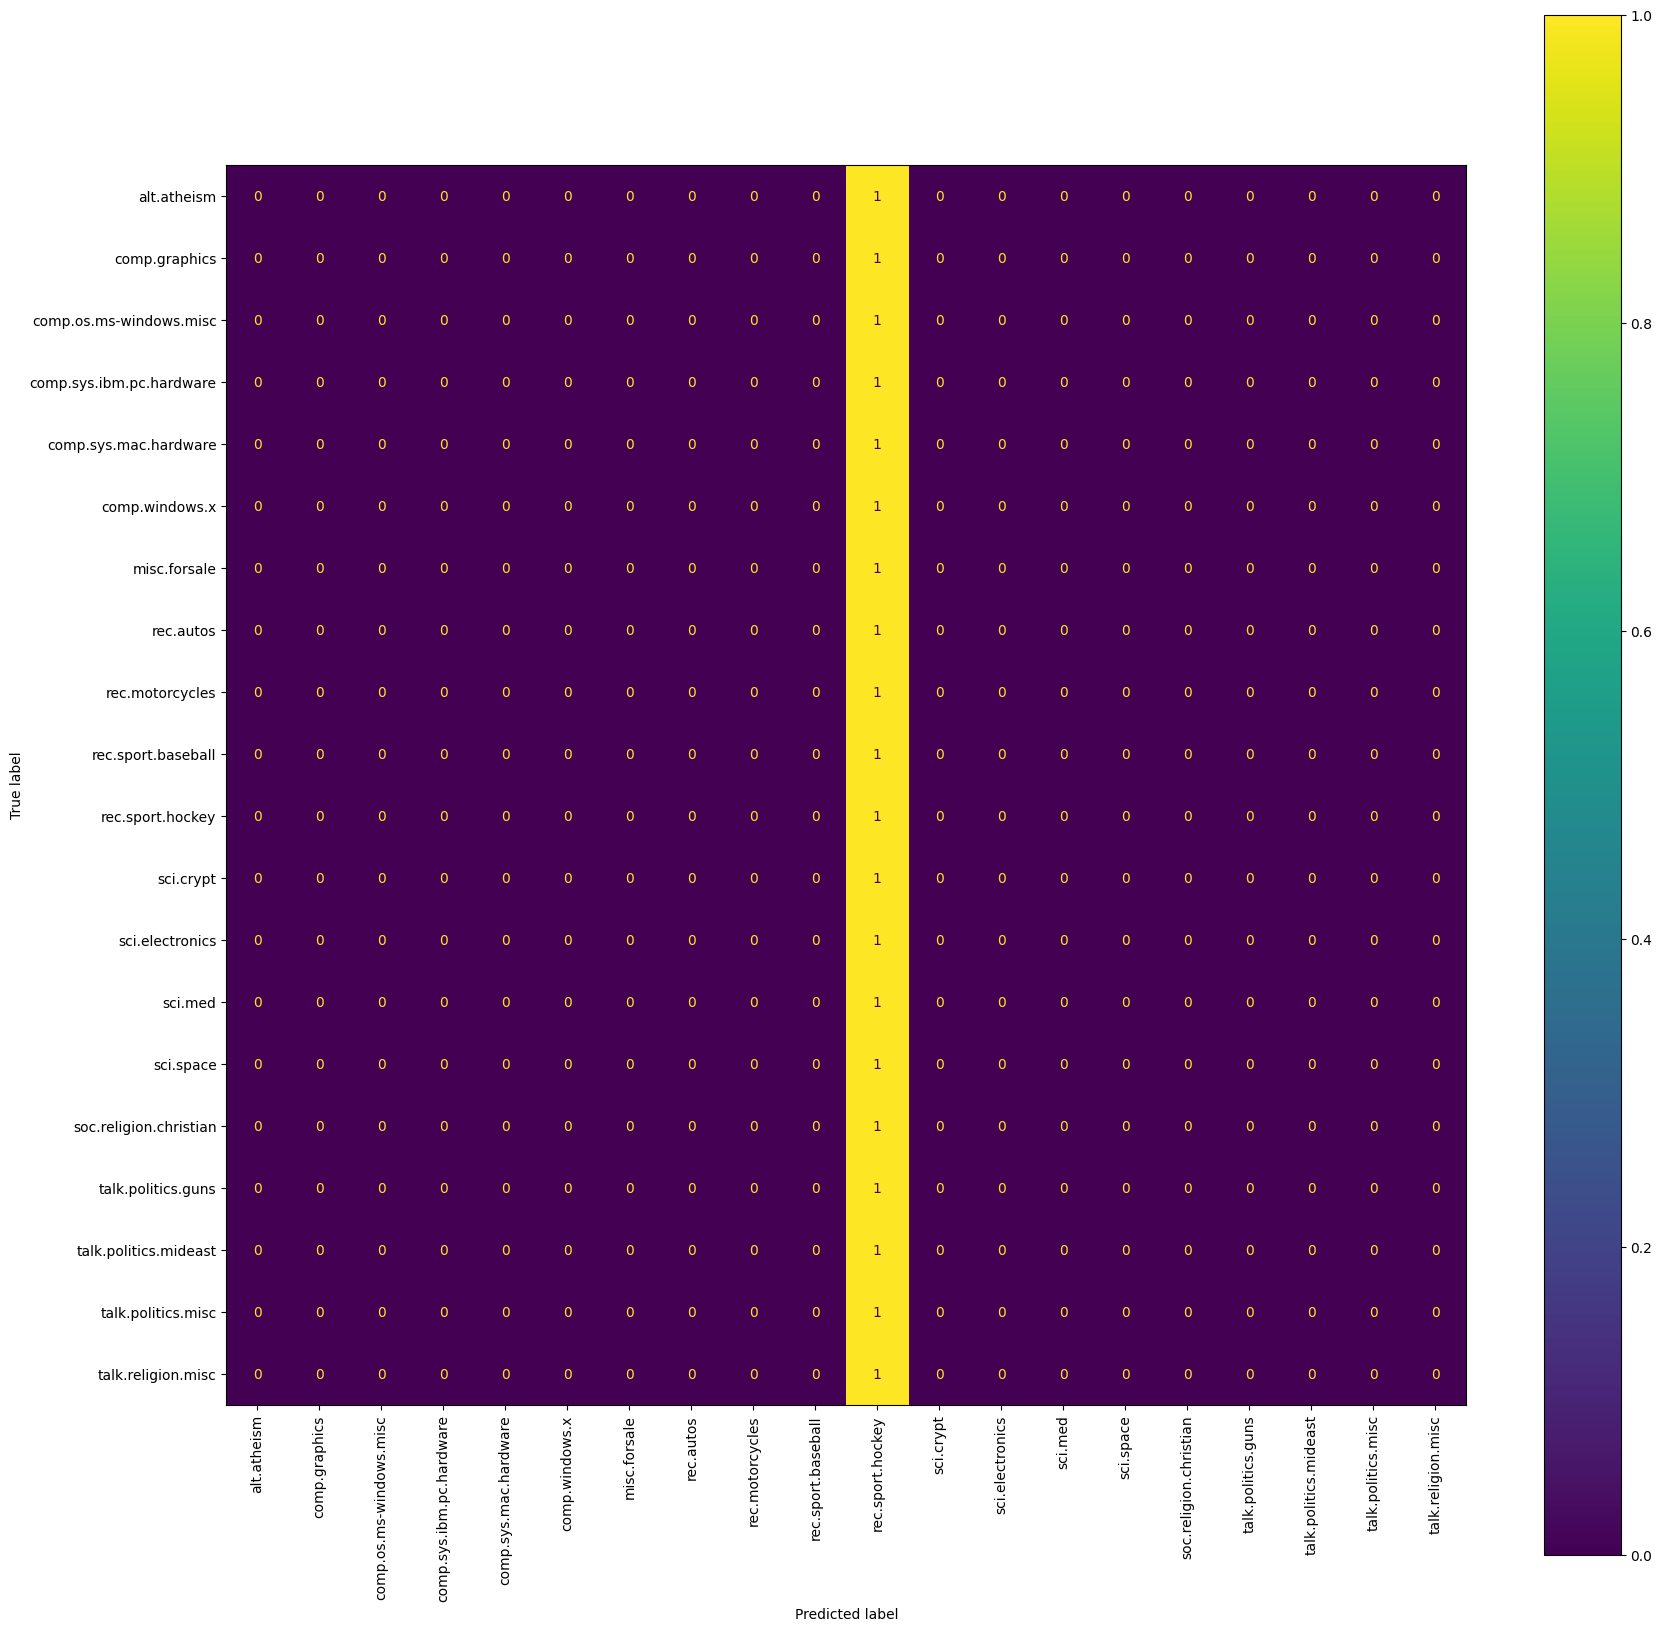

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# Figure size
fig, ax = plt.subplots(figsize=(20,20))
ax.grid(False)
#create the confusion matrix
# Corrected 'dispaly_labels' to 'display_labels'
disp = ConfusionMatrixDisplay.from_estimator(clf ,X_test,y_test,normalize='true',display_labels=train_corpus.target_names,xticks_rotation='vertical',ax=ax)

In [ ]:
from sklearn.metrics import classification_report
# Correct the typo 'traget_names' to 'target_names'
print(classification_report(y_test,test_preds,target_names=train_corpus.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       319
           comp.graphics       0.00      0.00      0.00       389
 comp.os.ms-windows.misc       0.00      0.00      0.00       394
comp.sys.ibm.pc.hardware       0.00      0.00      0.00       392
   comp.sys.mac.hardware       0.00      0.00      0.00       385
          comp.windows.x       0.00      0.00      0.00       395
            misc.forsale       0.00      0.00      0.00       390
               rec.autos       0.00      0.00      0.00       396
         rec.motorcycles       0.00      0.00      0.00       398
      rec.sport.baseball       0.00      0.00      0.00       397
        rec.sport.hockey       0.05      1.00      0.10       399
               sci.crypt       0.00      0.00      0.00       396
         sci.electronics       0.00      0.00      0.00       393
                 sci.med       0.00      0.00      0.00       396
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Improvement baseline**

Let's try to improve upon the above baseline using the things we've learnt so far. For starters, we'll use add lemmatization and stop-word removal to our tokenizer. This will reduce the number of synonyms and low information words.

In [ ]:
#disable ner and parser to save time
unwanted_pipes = ['ner','parser']

#custom tokenizer using spacy
def custom_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
      return [token.lemma_ for token in nlp(doc) if not token.is_stop and not token.is_punct and token.is_space and t.is_alpha]

We'll use the TF-IDF representation as our vectorizer this time. This takes quite a bit longer than before because of the more complex tokenizer and vectorizer.

In [ ]:
#define vecotrizer
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

#fit and transform train data
X = vectorizer.fit_transform(train_corpus.data)
y = train_corpus.target

#transform test data
X_test = vectorizer.transform(test_corpus.data)
y_test = test_corpus.target

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Remember how additive smoothing is being applied in a Naive Bayes model for numerical stability. This is set using the parameter alpha and is default value

 1. We're now going to tune this hyperparameter using grid search. Even grid search and cross validation, the model is trained very quickly.

In [ ]:
from sklearn.model_selection import GridSearchCV
#parameters to tune
grid = {'alpha':[0.01,0.005,0.01,0.05,0.1,1.0]}

#define model
clf = MultinomialNB()

#define grid search
model =GridSearchCV(clf,param_grid=grid,scoring='f1_macro',cv=5,verbose=5)

#fit model
model.fit(X,y)
#print the best value of alpha
print('Best parameters:',model.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ........................alpha=0.01;, score=0.005 total time=   0.1s
[CV 2/5] END ........................alpha=0.01;, score=0.005 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.005 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.005 total time=   0.1s
[CV 5/5] END ........................alpha=0.01;, score=0.005 total time=   0.1s
[CV 1/5] END .......................alpha=0.005;, score=0.005 total time=   0.0s
[CV 2/5] END .......................alpha=0.005;, score=0.005 total time=   0.0s
[CV 3/5] END .......................alpha=0.005;, score=0.005 total time=   0.0s
[CV 4/5] END .......................alpha=0.005;, score=0.005 total time=   0.0s
[CV 5/5] END .......................alpha=0.005;, score=0.005 total time=   0.0s
[CV 1/5] END ........................alpha=0.01;, score=0.005 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;,

Evaluate the modal

In [ ]:
# predict on test set
test_preds =model.predict(X_test)

#measure f1-score
print('Test set f1-score:',f1_score(y_test,test_preds,average='macro'))

Test set f1-score: 0.005030891438658429


plot the classiifcation report

In [ ]:
print(classification_report(y_test,test_preds,target_names=train_corpus.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.00      0.00      0.00       319
           comp.graphics       0.00      0.00      0.00       389
 comp.os.ms-windows.misc       0.00      0.00      0.00       394
comp.sys.ibm.pc.hardware       0.00      0.00      0.00       392
   comp.sys.mac.hardware       0.00      0.00      0.00       385
          comp.windows.x       0.00      0.00      0.00       395
            misc.forsale       0.00      0.00      0.00       390
               rec.autos       0.00      0.00      0.00       396
         rec.motorcycles       0.00      0.00      0.00       398
      rec.sport.baseball       0.00      0.00      0.00       397
        rec.sport.hockey       0.05      1.00      0.10       399
               sci.crypt       0.00      0.00      0.00       396
         sci.electronics       0.00      0.00      0.00       393
                 sci.med       0.00      0.00      0.00       396
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Adding lemmatization and stop-word removal to the tokenizer improved F1-score from 57.5% to 63.2%.
Using TF-IDF instead of Bag-of-Word improved F1-score from 63.2% to 63.8%.
Tuning the additive smoothing hyperparameter improved F1-score from 63.8% to 67.6%.

The last thing we'll do is take a new article of text and classify it using our pipeline, which consists of tokenization, vectorization and naive bayes modelling.

We'll also return the confidence in our prediction, i.e. the estimated probability that the model believes the text belongs to that class.

In [ ]:
# Space related article
article = ["Messi to Brcelona,here we go!"]

# Fit the vectorizer to your training data (replace 'your_training_data' with the actual data)
vectorizer.fit(article)

# Vectorize text
X_article = vectorizer.transform(article)

# Predict probability of each class
proba_article = model.predict_proba(X_article)

# Calculate predicted class and confidence
id_max = np.argmax(proba_article)
pred_article = train_corpus.target_names[id_max]
conf = np.max(proba_article)

# Print predictions
print('Prediction:', pred_article)
print('Confidence:', conf)

Prediction: rec.sport.hockey
Confidence: 0.0530316422131872
